In [2]:
# FUENTE: https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/
# https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models
# sobre métricas para regresión https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
# https://datascience.stackexchange.com/questions/42760/mad-vs-rmse-vs-mae-vs-msle-vs-r%c2%b2-when-to-use-which

# plot line of best for multiple robust regression algorithms
from random import random
from random import randint
from random import seed
from numpy import arange
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
import matplotlib.pyplot as plt
import requests
import io
import pandas as pd


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
# define functions

# prepare the dataset
def get_dataset():
    X, y = make_regression(
        n_samples=100,      # 100 observaciones
        n_features=1,       # 1 sola variable independiente (X)
        tail_strength=0.9,  # estructura de colas para datos con rango efectivo
        effective_rank=1,   # rango efectivo de la matriz de datos
        n_informative=1,    # solo 1 variable realmente influye en y
        noise=3,            # ruido gaussiano agregado
        bias=50,            # intercepto (desplaza hacia arriba la salida)
        random_state=1
    )
    # Agregar outliers artificiales
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
        if random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()
    return X, y

# dictionary of model names and model objects
def get_models():
    models = list()
    models.append(LinearRegression())   # regresión lineal estándar (sensitiva a outliers)
    models.append(HuberRegressor())     # robusta frente a outliers leves
    models.append(RANSACRegressor())    # ignora puntos "lejanos" y ajusta solo inliers
    models.append(TheilSenRegressor())  # método robusto basado en medianas
    return models

# Esta función toma un modelo, lo ajusta, predice sobre un rango de valores y dibuja la recta/curva ajustada
def plot_best_fit(X, y, xaxis, model):
    # Entrenar el modelo
    model.fit(X, y)
    # Predicciones sobre una grilla de valores en X
    yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
    # Dibujar la línea de mejor ajuste
    plt.plot(xaxis, yaxis, label=type(model).__name__)



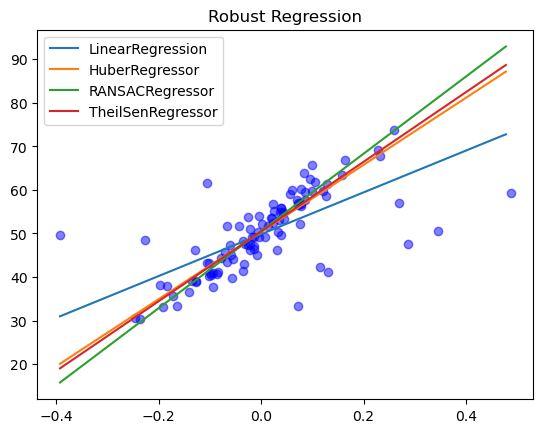

In [4]:
# 📌 1. Cargar el dataset con outliers
X, y = get_dataset()

# 📌 2. Definir un rango de valores para graficar las líneas de ajuste
# arange(min, max, paso) → crea una grilla de valores uniformes
xaxis = np.arange(X.min(), X.max(), 0.01)

# 📌 3. Entrenar y graficar cada modelo
for model in get_models():
    # Cada modelo entrena y dibuja su recta con la función definida antes
    plot_best_fit(X, y, xaxis, model)

plt.scatter(X, y, color='blue', alpha=0.5, label="Datos")
plt.title('Robust Regression')
plt.legend()
plt.show()


# Otro ejemplo

In [19]:
url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-en-espacios-verdes/arbolado-en-espacios-verdes.csv'
arb = requests.get(url).content
data_arbolado_parques = pd.read_csv(io.StringIO(arb.decode('utf-8')))    # también podríamos cargarlo con pd.read_csv(url)
data_arbolado_parques
# Filtrar valores únicos de la columna 'ubicacion' que contengan 'Libertador'
# libertador = data_arbolado_parques['ubicacion'] \
#                 .dropna() \
#                 .unique()

# libertador = [u for u in libertador if "LIBERTADOR" in u]

# print("Ubicaciones que contienen 'LIBERTADOR':")
# for u in libertador:
#     print("-", u)


,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_com,nombre_cie,tipo_folla,espacio_ve,ubicacion,nombre_fam,nombre_gen,origen,coord_x,coord_y
0,-58.477564,-34.645015,1,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.305719,98253.300738
1,-58.477559,-34.645047,2,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.751564,98249.733979
2,-58.477551,-34.645091,3,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98693.494639,98244.829684
3,-58.478129,-34.644567,4,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98640.439091,98302.938142
4,-58.478121,-34.644598,5,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98641.182166,98299.519997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51497,-58.505752,-34.562998,51725,15,30,0,45,Casuarina,Casuarina cunninghamiana,Árbol Latifoliado Perenne,GENERAL PAZ,"LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AI...",Casuarinaceas,Casuarina,Exótico,96104.125550,107350.962385
51498,-58.507111,-34.565843,51726,13,31,0,45,Casuarina,Casuarina cunninghamiana,Árbol Latifoliado Perenne,GENERAL PAZ,"LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AI...",Casuarinaceas,Casuarina,Exótico,95979.513368,107035.237268
51499,-58.475721,-34.565192,51727,11,28,0,17,Árbol del cielo (Ailanto o Árbol de los dioses),Ailanthus altissima,Árbol Latifoliado Caducifolio,"CAMPELO, LICENCIADO CARLOS",ESTACIÓN COGHLAN - Propiedad particular e/UGAR...,Simarrubáceas,Ailanthus,Exótico,98860.090864,107108.347622
51500,-58.507026,-34.565670,51728,5,32,0,342,Ciprés,Cupressus sp.,Árbol Conífero Perenne,GENERAL PAZ,"LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AI...",Cupresáceas,Cupressus,Exótico,95987.288841,107054.471332


In [6]:
print(data_arbolado_parques.shape)
print(data_arbolado_parques.columns)

(51502, 17)
Index(['long', 'lat', 'id_arbol', 'altura_tot', 'diametro', 'inclinacio',
       'id_especie', 'nombre_com', 'nombre_cie', 'tipo_folla', 'espacio_ve',
       'ubicacion', 'nombre_fam', 'nombre_gen', 'origen', 'coord_x',
       'coord_y'],
      dtype='object')


In [7]:
len(data_arbolado_parques['nombre_com'].unique())   # cantidad total de especies de árboles en CABA

337

In [ ]:
# 📌 1. Definimos las columnas que nos interesan
col_interes = ['diametro', 'altura_tot', 'nombre_com']
nombre = 'nombre_com'   # aclaración: nombre común del árbol, no el científico
nombres_interes = ['Jacarandá', 'Palo borracho rosado', 'Eucalipto', 'Ceibo']

# 📌 2. Seleccionamos solo esas columnas del DataFrame original
data_diametro_altura = data_arbolado_parques[col_interes].copy()

# 📌 3. Renombramos 'altura_tot' a simplemente 'altura'
data_diametro_altura.rename(columns={'altura_tot': 'altura'}, inplace=True)

# 📌 4. Filtramos el DataFrame quedándonos solo con las filas
# cuyo nombre común esté dentro de la lista de interés
diametro_altura_especies = data_diametro_altura[
    data_diametro_altura['nombre_com'].isin(nombres_interes)
]


In [9]:
# me quedo con los jacarandás o alguno de los otros
interesante= 'Jacarandá'

jaca = diametro_altura_especies[diametro_altura_especies['nombre_com'] == interesante]
jaca.reset_index(inplace=True)
print(jaca.shape)
print(jaca.head())
jaca=jaca.drop(['nombre_com', 'index'], axis=1)
jaca.tail()
# jaca.shape    # (3255, 2)


(3255, 4)
   index  diametro  altura nombre_com
0    165        10       5  Jacarandá
1    166        10       5  Jacarandá
2    167        10       5  Jacarandá
3    168        10       5  Jacarandá
4    169        10       5  Jacarandá


,diametro,altura
3250,97,7
3251,28,8
3252,30,2
3253,10,3
3254,40,17


Text(0.5, 1.0, 'Jacarandá: Altura vs. Diámetro')

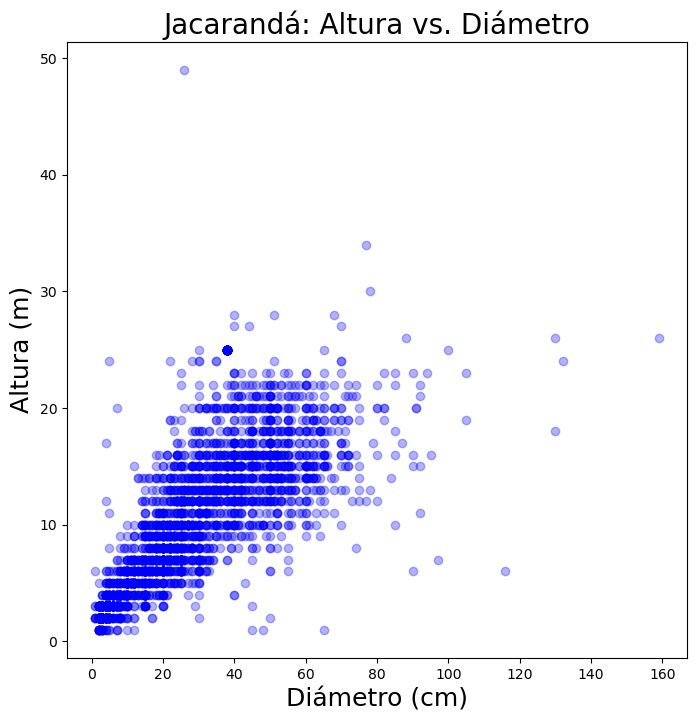

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(jaca['diametro'], jaca['altura'], 'bo', alpha=0.3)
plt.xlabel('Diámetro (cm)', size=18)
plt.ylabel('Altura (m)', size=18)
plt.title(f'{interesante}: Altura vs. Diámetro', size=20)

In [ ]:
# 📌 1. Definimos las features (X)
# - .to_numpy() lo convierte en un array de NumPy (n_filas, 1)
Xja = jaca[['diametro']].to_numpy()


# 📌 2. Definimos la variable de respuesta (y)
# - jaca['altura'] selecciona la columna altura como Series
# - .values lo convierte en array de NumPy (n_filas,)
yja = jaca['altura'].values
print("\nShape de yja:", yja.shape)
print("Primeros 5 valores de yja:\n", yja[:5])



In [21]:
print(type(yja))

<class 'numpy.ndarray'>


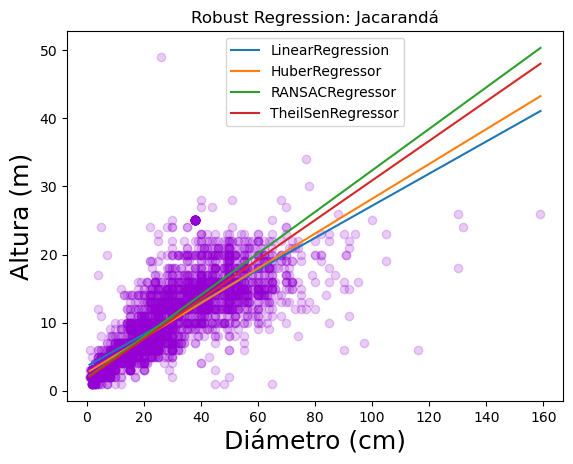

In [13]:
# define a uniform grid across the input domain
xaxis = arange(Xja.min(), Xja.max(), 0.01)
for model in get_models():
	# plot the line of best fit
	plot_best_fit(Xja, yja, xaxis, model)
# plot the dataset
plt.scatter(Xja, yja, color='darkviolet', alpha=0.2)
plt.xlabel('Diámetro (cm)', size=18)
plt.ylabel('Altura (m)', size=18)
# show the plot
plt.title(f'Robust Regression: {interesante}')
plt.legend()
plt.show()